# TIME SERIES ARIMA MODEL

In [1]:
# for arima model
!pip install pmdarima

   ---------------------------------------- 0.0/625.1 kB ? eta -:--:--
    --------------------------------------- 10.2/625.1 kB ? eta -:--:--
   -- ------------------------------------ 41.0/625.1 kB 653.6 kB/s eta 0:00:01
   ---------- ----------------------------- 163.8/625.1 kB 1.6 MB/s eta 0:00:01
   ---------- ----------------------------- 163.8/625.1 kB 1.6 MB/s eta 0:00:01
   ------------------- -------------------- 307.2/625.1 kB 1.6 MB/s eta 0:00:01
   ---------------------------- ----------- 440.3/625.1 kB 1.8 MB/s eta 0:00:01
   ---------------------------------------  624.6/625.1 kB 2.2 MB/s eta 0:00:01
   ---------------------------------------- 625.1/625.1 kB 2.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   -- ------------------------------------- 0.2/2.8 MB 5.4 MB/s eta 0:00:01
   --- ------------------------------------ 0.3/2.8 MB 4.1 MB/s eta 0:00:01
   ----- ---------------------------------- 0.4/2.8 MB 3.0 MB/s eta 0:00:01


In [23]:
# importing liberaries

# for data manupulation
import pandas as pd
import numpy as np

# for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# setting graph parameters
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['figure.dpi'] = 250
%matplotlib inline

# for model buildibng and evaluation
from statsmodels.tsa.stattools import adfuller     #to check whether data is stationery or not
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error

# for ignoring future warnings
import warnings
warnings.filterwarnings('ignore')

In [25]:
df = pd.read_csv('https://raw.githubusercontent.com/dhanesh-sakre/DATA-SCIENCE/refs/heads/main/Time%20Series/ARIMA%20MODEL/AveargeTemp.csv', index_col=0, parse_dates=True)
df

,AvgTemp
DATE,
01-01-2014,40
02-01-2014,43
03-01-2014,41
04-01-2014,37
05-01-2014,31
...,...
26-12-2018,40
27-12-2018,39
28-12-2018,40


In [26]:
# descriptive stats
df.describe()

,AvgTemp
count,1821.000000
mean,46.818781
std,4.143192
min,31.000000
25%,44.000000
50%,47.000000
75%,50.000000
max,57.000000


In [27]:
# missing values
df.isna().sum()

AvgTemp    0
dtype: int64

In [29]:
# duplicated values
df.duplicated().sum()

1795

In [ ]:
# temprature values can be same for multiple datys so I cannot not remove the duplicated records in timeseries

In [31]:
# target column
df['AvgTemp']

DATE
01-01-2014    40
02-01-2014    43
03-01-2014    41
04-01-2014    37
05-01-2014    31
              ..
26-12-2018    40
27-12-2018    39
28-12-2018    40
29-12-2018    42
30-12-2018    46
Name: AvgTemp, Length: 1821, dtype: int64

<Axes: xlabel='DATE'>

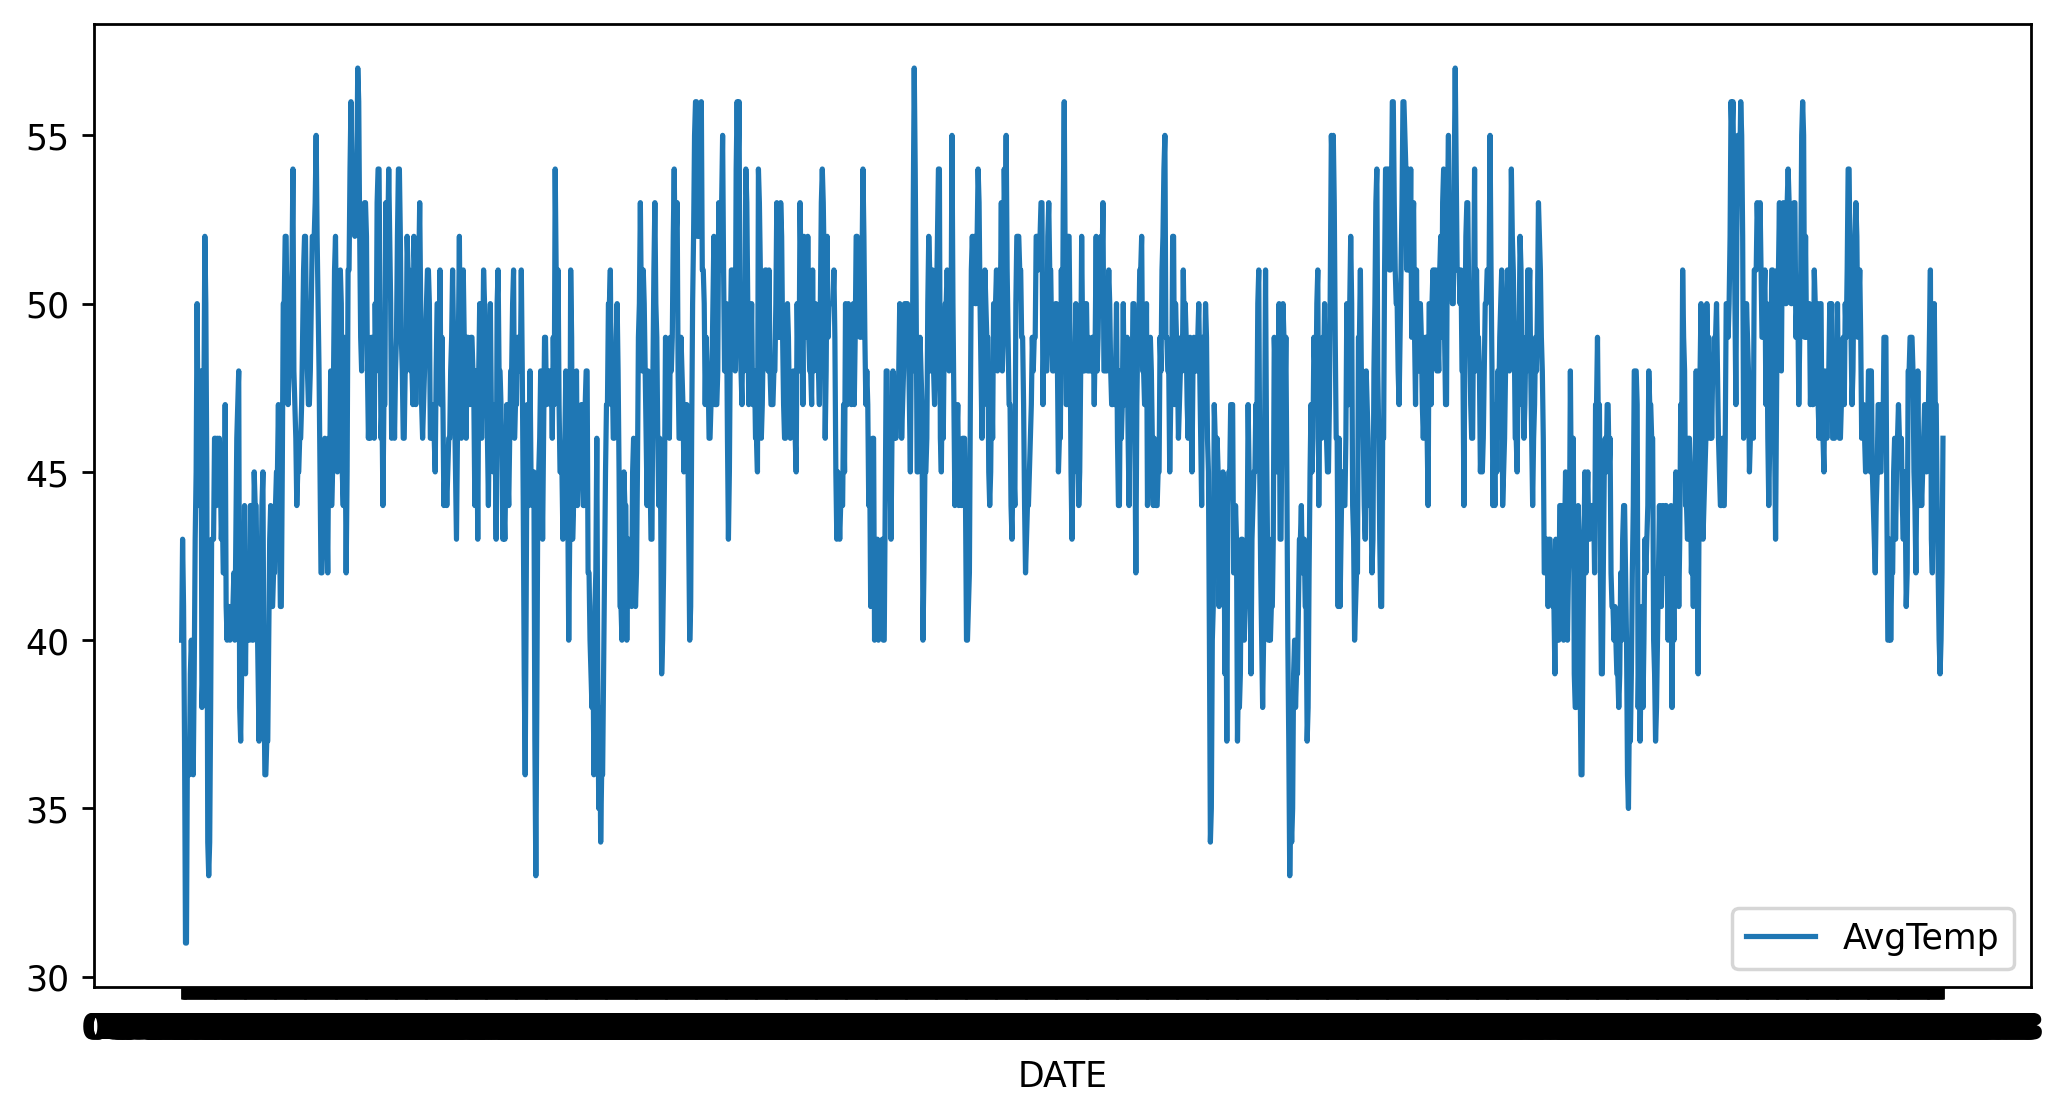

In [30]:
# plotting line plot for the data
sns.lineplot(df)

In [ ]:
# there is no trend but additive seasonality is present

In [ ]:
# adfuller to confirm the trend like wherther the data is stationery or non stationery
# it runs a hypothesis
# null hypothesis : data is non-stationary
# alternate hypothesis : data is stationary

In [34]:
adfuller(df['AvgTemp'])[1]

8.67593748019975e-09

In [ ]:
# this is a value of p which is less than 0 that means it is less than alpha(0.5)
# that means reject null hypothesis
# so this data is stationary

In [36]:
order = auto_arima(df['AvgTemp'])
order

ARIMA(order=(1, 0, 5), scoring_args={}, suppress_warnings=True)

In [ ]:
# it has returne values of p, d, q which is order of arima model
# p = 1
# d = 0
# q = 5

# let's build the model

In [37]:
df.shape

(1821, 1)

In [38]:
# split the data in train and test part
train = df.iloc[:-30]
test = df.iloc[-30:]

In [44]:
df.tail()

,AvgTemp
DATE,
26-12-2018,40
27-12-2018,39
28-12-2018,40
29-12-2018,42
30-12-2018,46


In [43]:
train.tail()

,AvgTemp
DATE,
26-11-2018,49
27-11-2018,49
28-11-2018,49
29-11-2018,48
30-11-2018,45


In [49]:
test.head()

,AvgTemp
DATE,
01-12-2018,44
02-12-2018,42
03-12-2018,45
04-12-2018,48
05-12-2018,45


# MODEL BUILDING

In [50]:
train.shape

(1791, 1)

In [51]:
test.shape

(30, 1)

In [54]:
# model building and training
arima = ARIMA(train['AvgTemp'], order= (1, 0, 5)).fit()

In [55]:
test

,AvgTemp
DATE,
01-12-2018,44
02-12-2018,42
03-12-2018,45
04-12-2018,48
05-12-2018,45
06-12-2018,44
07-12-2018,45
08-12-2018,44
09-12-2018,45


In [58]:
# getting prediction for test data
# I need to mention the row number form which row to uptill which row I want to pass to the model
ypred = arima.predict(start=1791, end=1820)
ypred

1791    44.754109
1792    44.987795
1793    45.388741
1794    45.721546
1795    45.863733
1796    45.874126
1797    45.884370
1798    45.894466
1799    45.904417
1800    45.914225
1801    45.923891
1802    45.933419
1803    45.942809
1804    45.952064
1805    45.961185
1806    45.970176
1807    45.979036
1808    45.987770
1809    45.996377
1810    46.004861
1811    46.013222
1812    46.021463
1813    46.029586
1814    46.037591
1815    46.045482
1816    46.053258
1817    46.060923
1818    46.068477
1819    46.075923
1820    46.083261
Name: predicted_mean, dtype: float64

In [61]:
# measuring performance of model by using mean_square_error

mse_value = mean_squared_error(test['AvgTemp'], ypred)
print(f'mean squared error of the model is {mse_value}')

mean squared error of the model is 9.00278366181206


In [ ]:
# mse values is very low that means my model performing bery well on this dataset

In [63]:
df.head()

,AvgTemp
DATE,
01-01-2014,40
02-01-2014,43
03-01-2014,41
04-01-2014,37
05-01-2014,31
